In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [110]:
df = pd.read_csv("SampleSuperstore.csv")

In [111]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [112]:
df.shape

(9994, 13)

In [113]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [114]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [115]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [116]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [117]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [118]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Analysing which mode had most sales

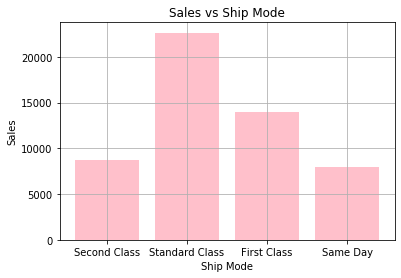

In [119]:
plt.bar('Ship Mode','Sales',data=df, color = 'pink')
plt.title("Sales vs Ship Mode")
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.grid()

###  Analysing which category had most sales

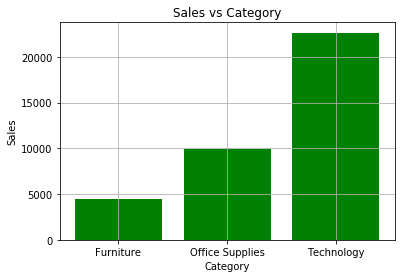

In [120]:
plt.bar("Category",'Sales',data=df, color= 'green')
plt.title("Sales vs Category")
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid()

### Quantity wise analysis

In [121]:
df.groupby('Category')['Quantity'].sum().reset_index()

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


### Sub Category wise profit analysis

In [122]:
dftop10_items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)
dftop10_items=dftop10_items.head(10)
dftop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


### State wise sales analysis

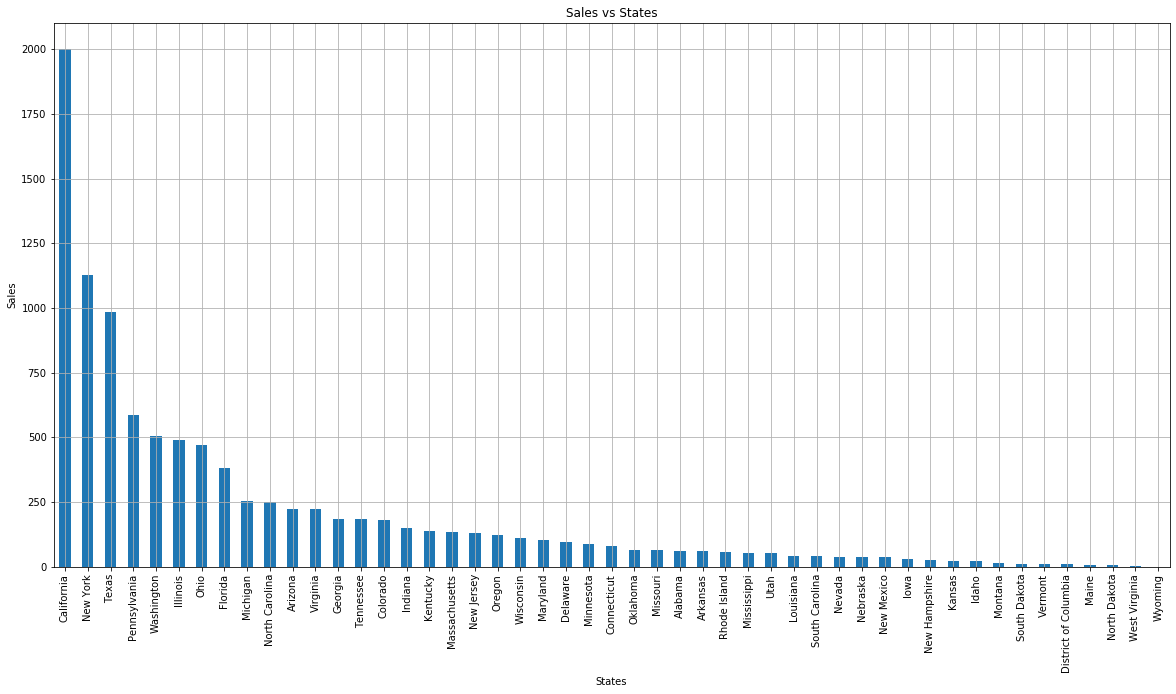

In [123]:
df['State'].value_counts().plot(kind='bar', figsize= (20,10))
plt.ylabel('Sales')
plt.xlabel('States')
plt.title('Sales vs States')
plt.grid()
plt.show()

### City wise profit contribution

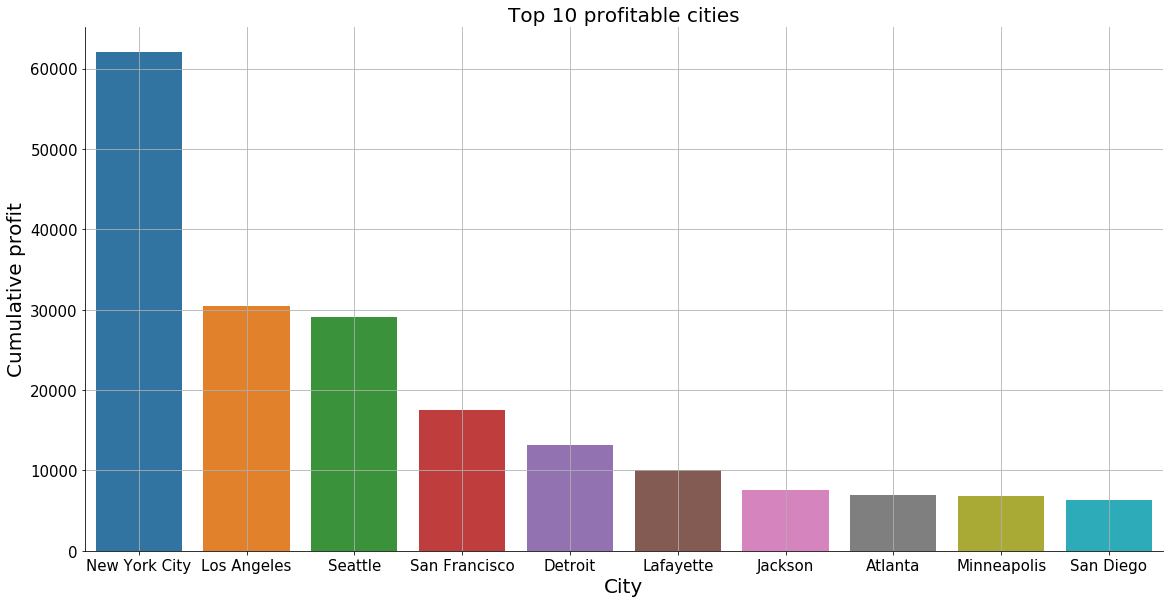

In [124]:
dftop10_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_cities = dftop10_cities.head(10)
sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8)
plt.title('Top 10 profitable cities',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=20)
plt.xlabel('City',size=20)
plt.grid()

### Profit wise product comparison

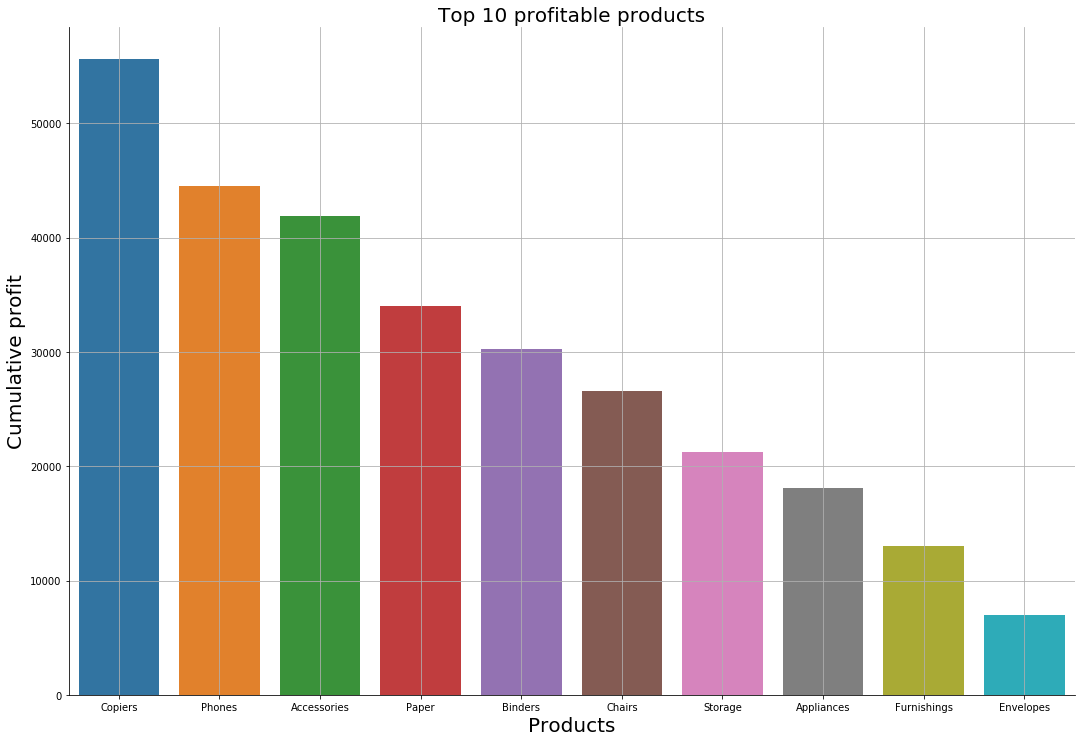

In [125]:
sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=10)
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.ylabel('Cumulative profit',size=20)
plt.xlabel('Products',size=20)
plt.grid()

### Percentage wise contribution of each sub category product 

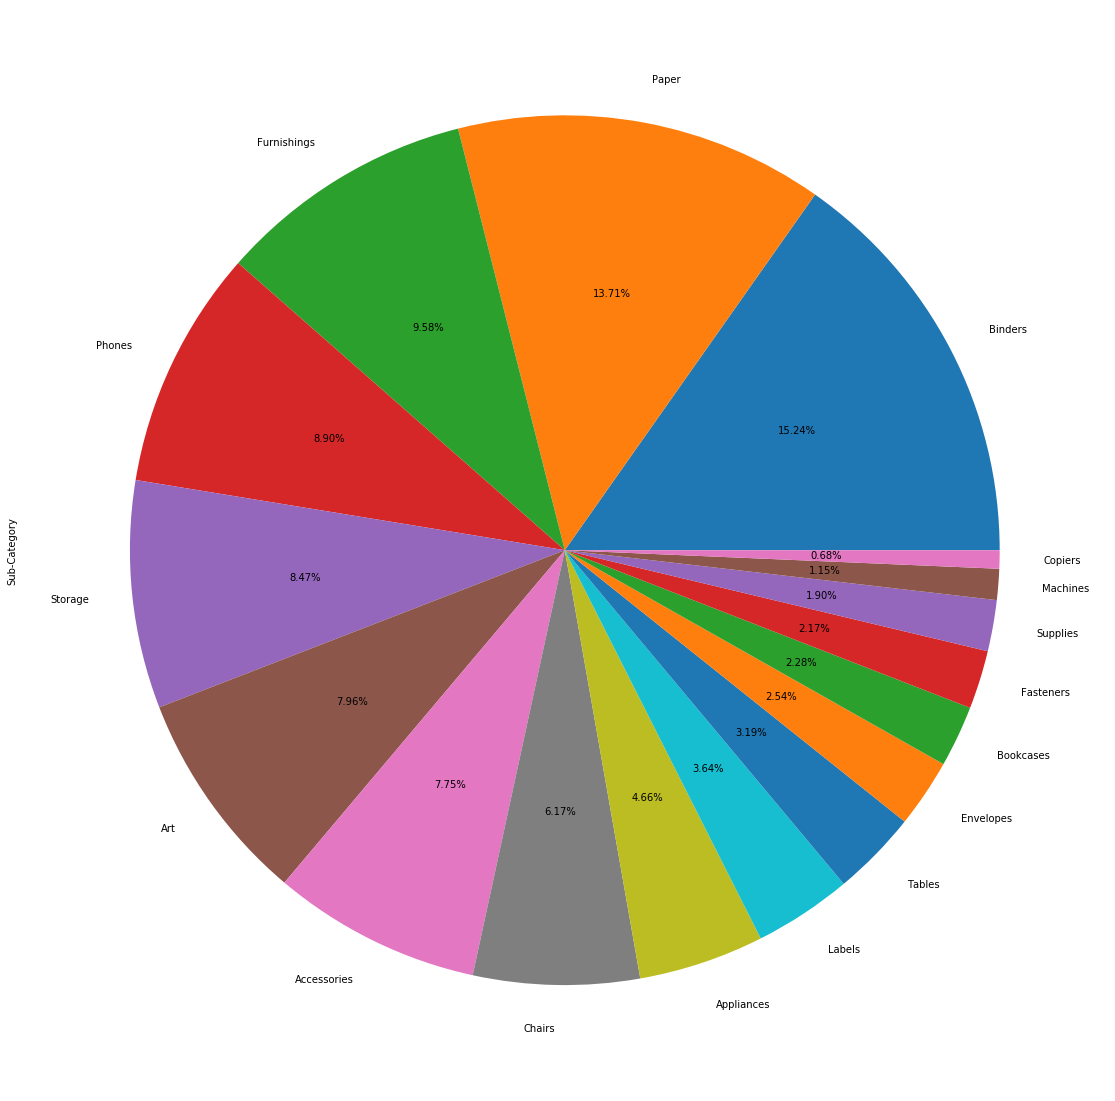

In [126]:
plt.figure(figsize=(20,20))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.2f%%')

plt.show()

### Analysis of Discount and Sales-Profit in cities

In [127]:
df.groupby(['State'])[['Sales', 'Discount','Profit']].mean().sort_values('Discount',ascending=False)

,Sales,Discount,Profit
State,,,
Illinois,162.939230,0.390041,-25.625787
Texas,172.779742,0.370193,-26.121174
Pennsylvania,198.487077,0.328620,-26.507598
Ohio,166.861697,0.324947,-36.186304
Colorado,176.418231,0.316484,-35.867351
Arizona,157.508933,0.303571,-15.303235
Florida,233.612815,0.299347,-8.875461
Tennessee,167.551219,0.291257,-29.189583
Oregon,140.573790,0.288710,-9.600569


### Loss making Cities

In [128]:
df.groupby(['State'])[['Sales', 'Discount','Profit']].mean().sort_values('Profit',ascending=True)

,Sales,Discount,Profit
State,,,
Ohio,166.861697,0.324947,-36.186304
Colorado,176.418231,0.316484,-35.867351
North Carolina,223.305880,0.283534,-30.083985
Tennessee,167.551219,0.291257,-29.189583
Pennsylvania,198.487077,0.328620,-26.507598
Texas,172.779742,0.370193,-26.121174
Illinois,162.939230,0.390041,-25.625787
Arizona,157.508933,0.303571,-15.303235
Oregon,140.573790,0.288710,-9.600569


### Region wise analysis for sales

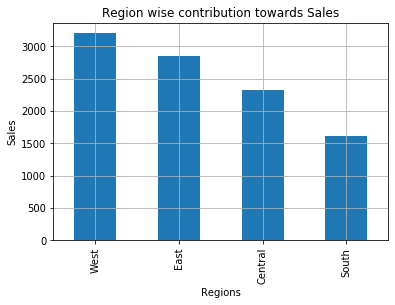

In [129]:
df['Region'].value_counts().plot(kind = 'bar')
plt.title('Region wise contribution towards Sales')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Conclusion : 
###### Hence, from the above analysis we conclude that technology related products are most profitable.
###### Also Western coast and Eastern cost are more profitable when compared to others.
###### Binder is the most popular item and mostly Standard Class shipping method  is preferred.
###### Ohio, Colorado, North Carolina, Tennessee, Pennsylvania, Texas, Illinois, Arizona are the cities that each of them contibute to more than 
###### 10% loss
###### New York City, Los Angeles, Seattle and San Francisco are very profitable cities
###### California State has the highest sales among all 
###### Copiers, Phones and Accessories contribute a lot to profit